In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('C:\\Users\\crist\\Rossmann\\data\\raw\\train.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, low_memory=False)    

In [3]:
data.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1


#### Variables ####

- Id — an Id that represents a (Store, Date) duple within the test set
- Store — a unique Id for each store
- Sales — the turnover for any given day (this is what you are predicting)
- Customers — the number of customers on a given day
- Open — an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday — indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday — indicates if the (Store, Date) was affected by the closure of public schools
- StoreType — differentiates between 4 different store models: a, b, c, d
- Assortment — describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance — distance in meters to the nearest competitor store
- CompetitionOpenSince [Month/Year] — gives the approximate year and month of the time the nearest competitor was opened
- Promo — indicates whether a store is running a promo on that day
- Promo2 — Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] — describes the year and calendar week when the store started participating in Promo2
- PromoInterval — describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. “Feb, May ,Aug, Nov” means each round starts in February, May, August, November of any given year for that store

In [2]:
df =  pd.read_parquet('C:\\Users\\crist\\Rossmann\\data\\processed\\df.parquet', engine='auto')

In [3]:
years = [2013, 2014, 2015]
df['year'] = df['Date'].apply(lambda x: x[:4]).astype('int')
df['month'] = df['Date'].apply(lambda x: x[5:7]).astype('int')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None,2015,7
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None,2015,7
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None,2015,7
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None,2015,7
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None,2015,7


In [8]:
df.shape

(1017209, 18)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

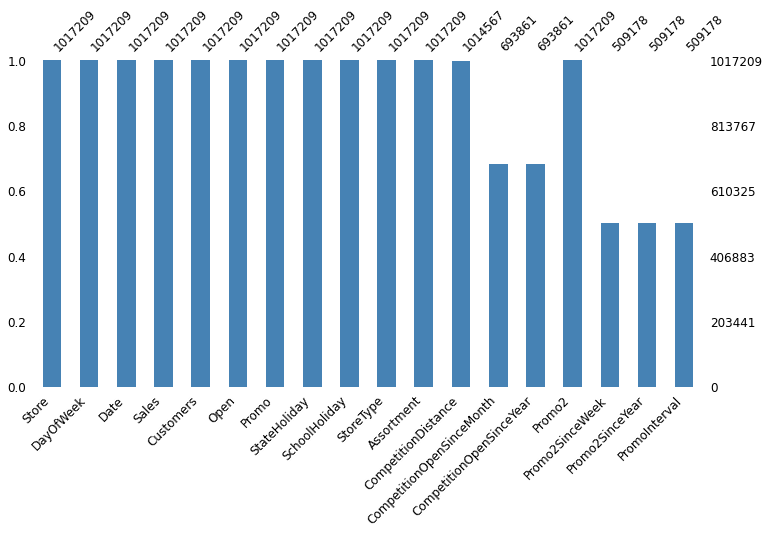

In [10]:
import missingno as msno

msno.bar(df, figsize=(12, 6), fontsize=12, color="steelblue");

### Correlation between variables ###

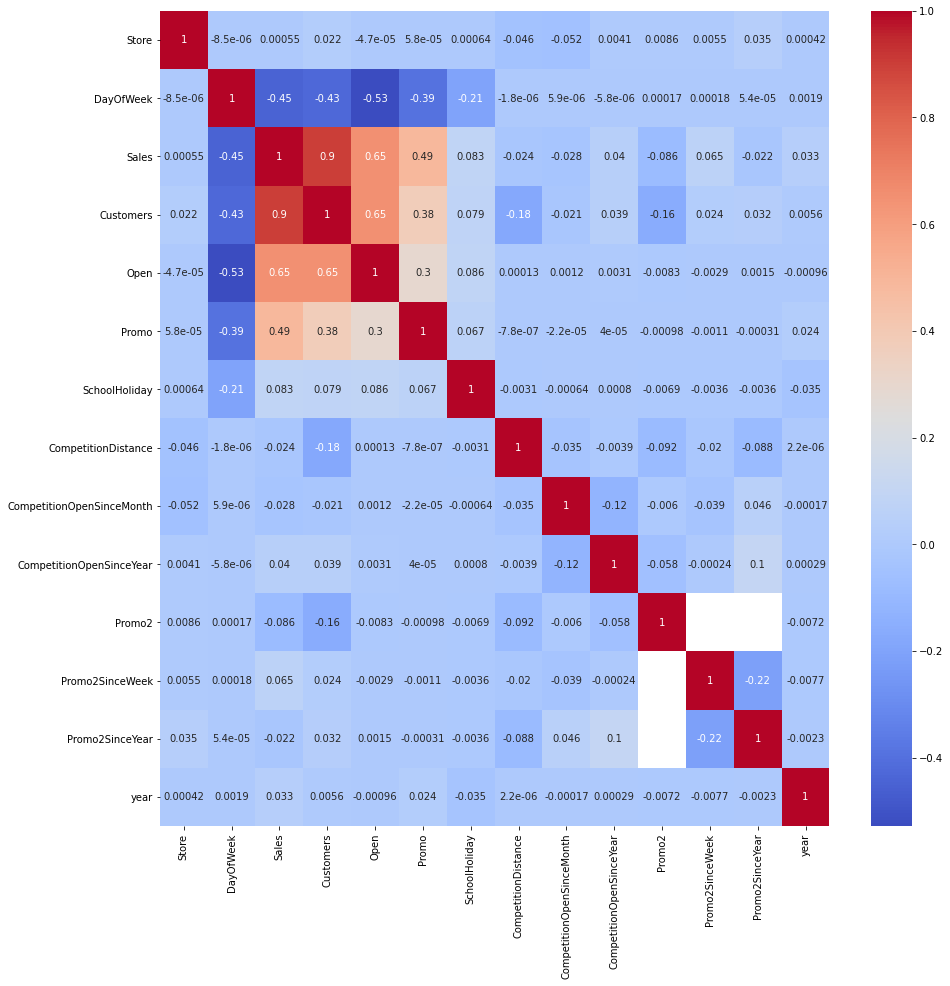

In [22]:
cor = df.corr('spearman')
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cor, annot=True, ax=ax, cmap="coolwarm");

We seek for an unsymetric or non-linear relation

C:\Users\crist\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least

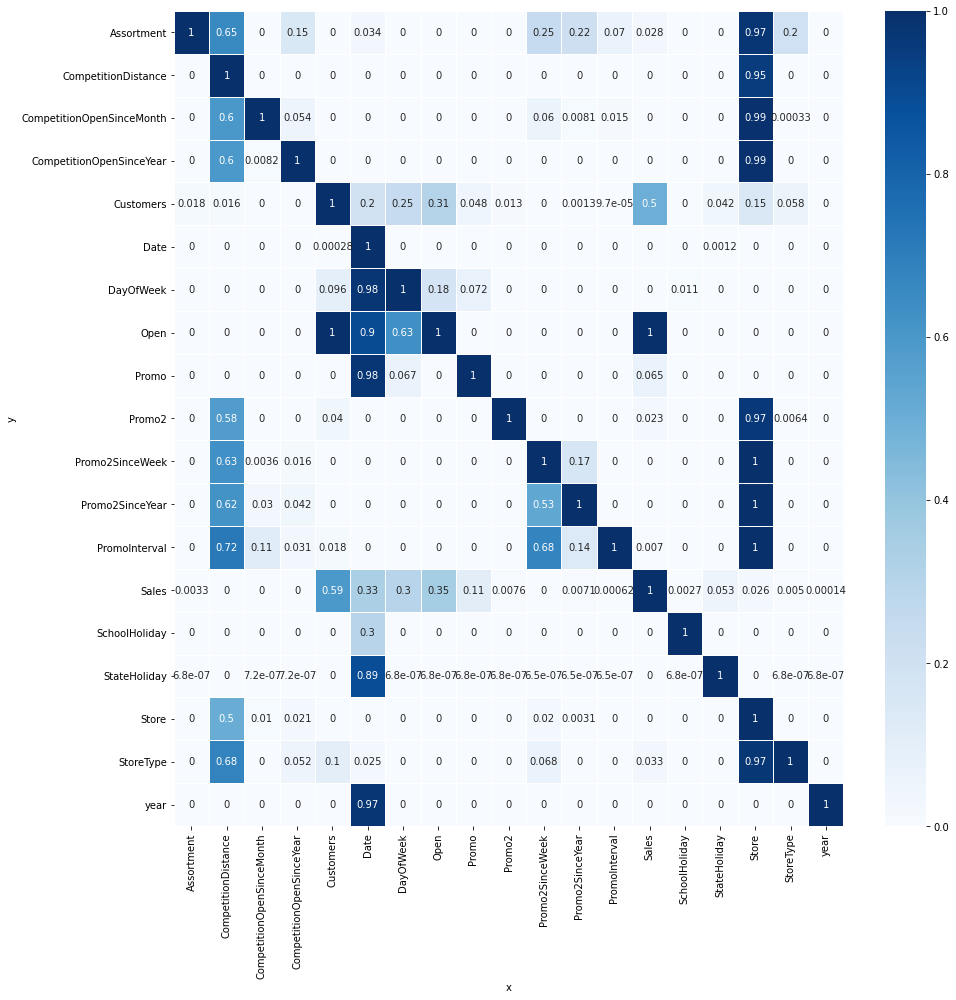

In [23]:
import ppscore as pps
import seaborn as sns
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True);

### Sales distribution ### 

C:\Users\crist\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

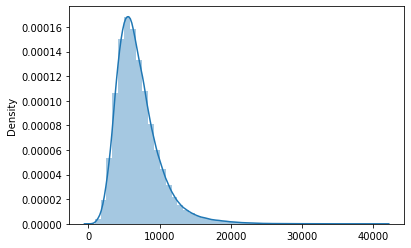

In [33]:
Sales = df[df['Sales']!=0].Sales.values
sns.distplot(Sales)

C:\Users\crist\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

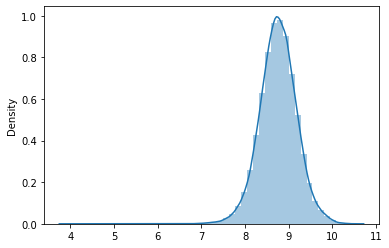

In [37]:
Sales = df[df['Sales']!=0].Sales.values
sns.distplot(np.log(Sales))

### Sales by day of the week ###

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


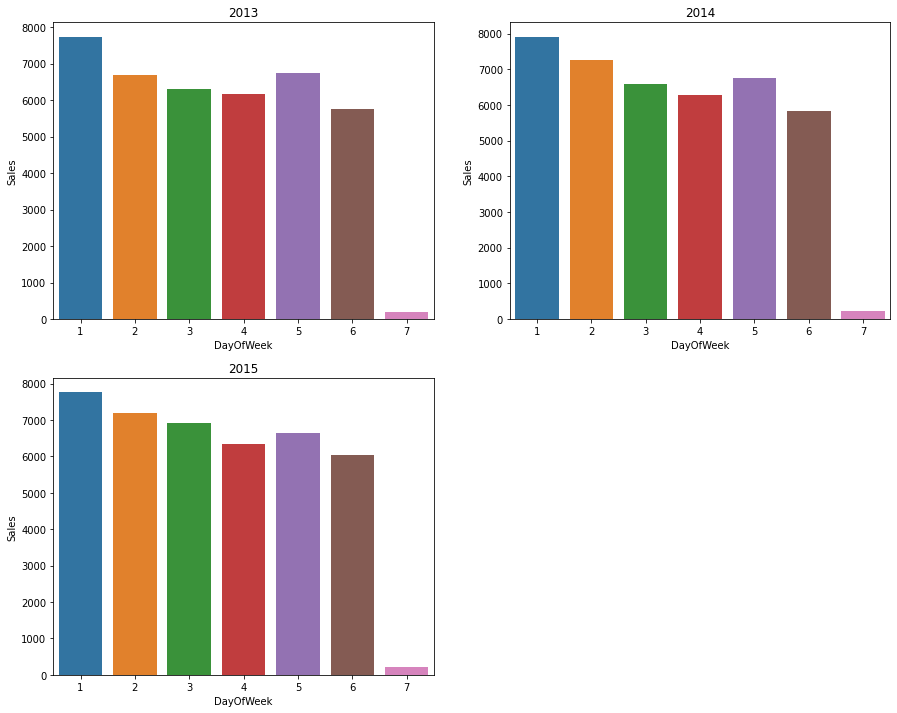

In [8]:
years = [2013, 2014, 2015]
df['year'] = df['Date'].apply(lambda x: x[:4]).astype('int')

#df['year']=df.year.astype('int')
group_2013 = df[df['year']==2013].groupby('DayOfWeek').agg({'Sales':'mean'})
group_2014 = df[df['year']==2014].groupby('DayOfWeek').agg({'Sales':'mean'})
group_2015 = df[df['year']==2015].groupby('DayOfWeek').agg({'Sales':'mean'})

plt.figure(figsize=(15,12))
j=1
for year in years:
    
    plt.subplot(2,2,j)

    sns.barplot(globals()['group_'+ str(year)].index, globals()['group_'+ str(year)].Sales)
    plt.title(year)
    j+=1

The patron is the same all years. The days when the sales are smaller are Saturdays and Sundays. 

### Sales by day when the shop is open ### 

In [23]:
group_2013 = df[(df['year']==2013)&(df.Open ==1)].groupby('DayOfWeek').agg({'Sales':'mean'})
group_2014 = df[(df['year']==2014)&(df.Open ==1)].groupby('DayOfWeek').agg({'Sales':'mean'})
group_2015 = df[(df['year']==2015)&(df.Open ==1)].groupby('DayOfWeek').agg({'Sales':'mean'})


C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


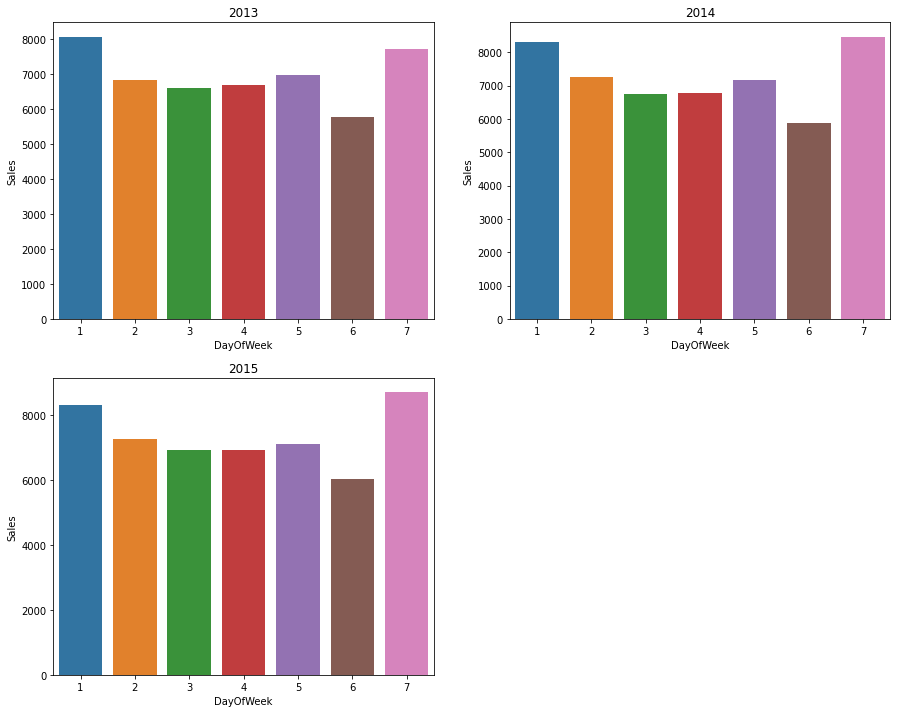

In [24]:
plt.figure(figsize=(15,12))
j=1
for year in years:
    
    plt.subplot(2,2,j)

    sns.barplot(globals()['group_'+ str(year)].index, globals()['group_'+ str(year)].Sales)
    plt.title(year)
    j+=1

Things change when is only taken into account the days where the shops are opened. In this case the day with most sales is Sunday followed by Monday

### Sales distribution by shops ###

In [32]:
# We choose randomly some shops and we represent the sales distribution to see the pattern.

stores = np.random.randint(1,1115, size = 5)
for element in stores:
    globals()['store_'+ str(element)] = df.loc[(df["Store"]==element)&(df['Sales']>0) , ['Date',"Sales"]]



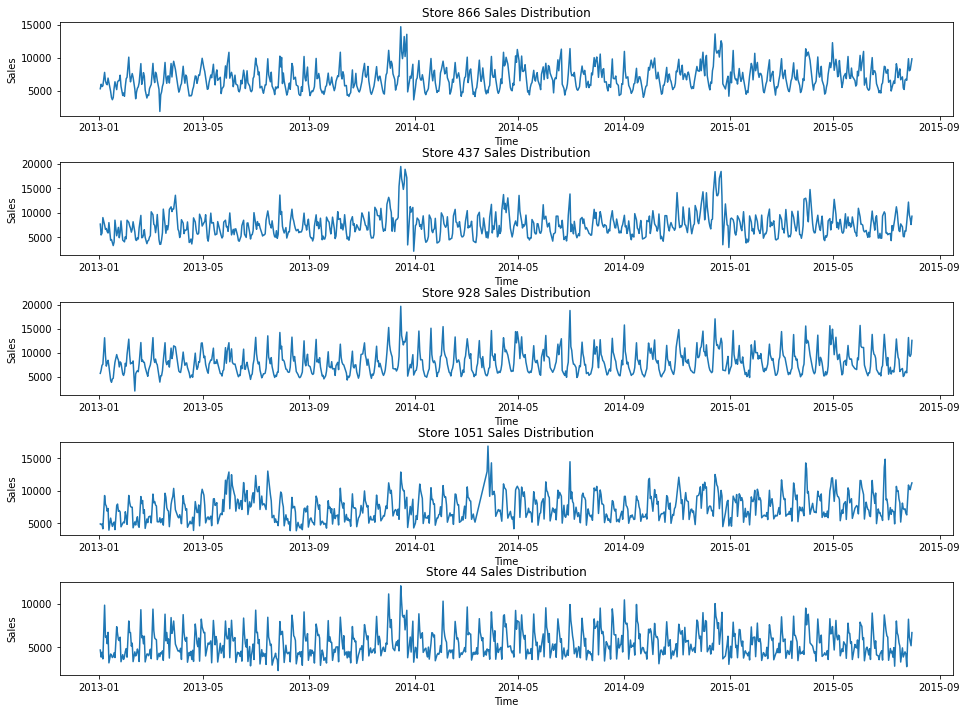

In [33]:
f = plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace = 0.5)
j=1
for element in stores:
    ax1 = f.add_subplot(5,1,j)
    ax1.plot(globals()['store_' + str(element)]['Date'], globals()['store_' + str(element)]['Sales'], '-')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Sales')
    ax1.set_title('Store' + " " + str(element) + " " + 'Sales Distribution')
    j+=1

### Ventas por meses con tiendas abiertas ### 

In [38]:
 df['Month'] = pd.DatetimeIndex(df['Date']).month

In [39]:
group_2013 = df[(df['year']==2013)&(df.Open ==1)].groupby('Month').agg({'Sales':'mean'})
group_2014 = df[(df['year']==2014)&(df.Open ==1)].groupby('Month').agg({'Sales':'mean'})
group_2015 = df[(df['year']==2015)&(df.Open ==1)].groupby('Month').agg({'Sales':'mean'})


C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


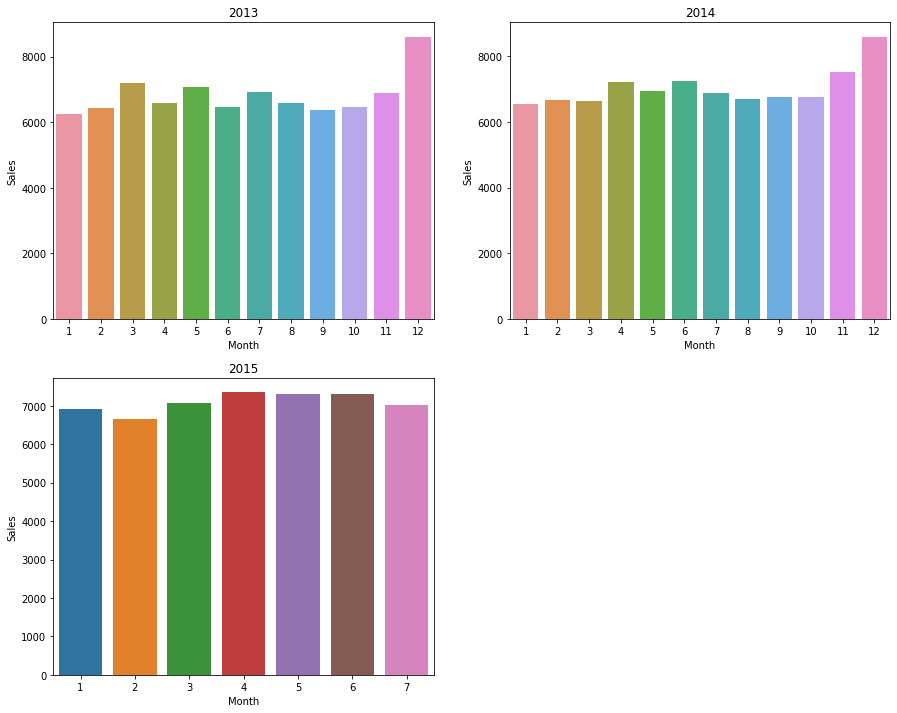

In [40]:
plt.figure(figsize=(15,12))
j=1
for year in years:
    
    plt.subplot(2,2,j)

    sns.barplot(globals()['group_'+ str(year)].index, globals()['group_'+ str(year)].Sales)
    plt.title(year)
    j+=1

### Sales school Holiday by day per year ###

In [47]:
group_2013 = df[(df['year']==2013)&(df.Open==1)&(df.SchoolHoliday ==1)].groupby('DayOfWeek').agg({'Sales':'mean'})
group_2014 = df[(df['year']==2014)&(df.Open==1)&(df.SchoolHoliday ==1)].groupby('DayOfWeek').agg({'Sales':'mean'})
group_2015 = df[(df['year']==2015)&(df.Open==1)&(df.SchoolHoliday ==1)].groupby('DayOfWeek').agg({'Sales':'mean'})

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


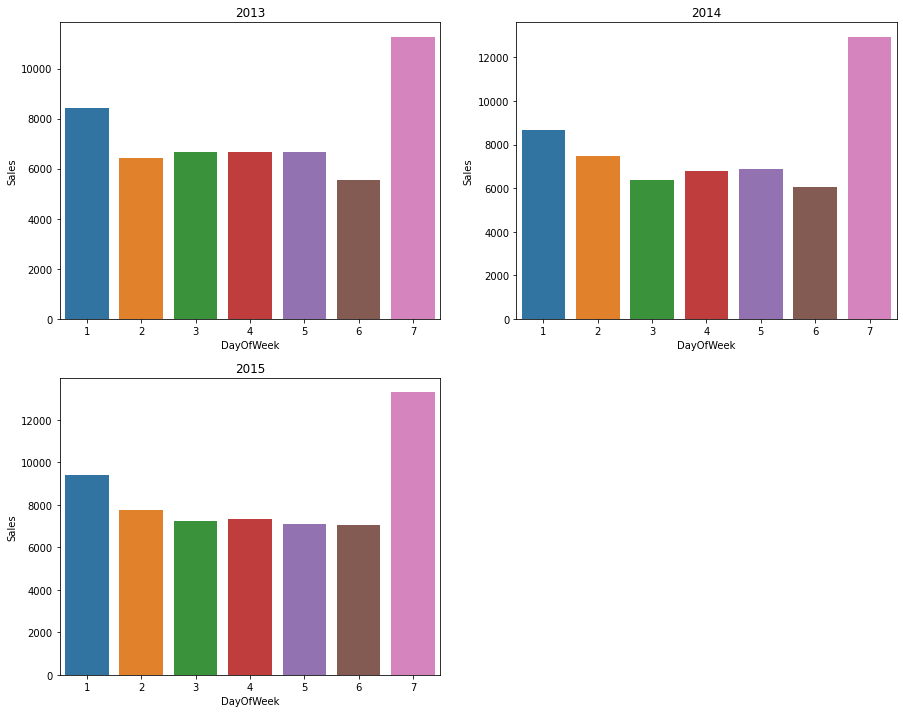

In [48]:
plt.figure(figsize=(15,12))
j=1
for year in years:
    
    plt.subplot(2,2,j)

    sns.barplot(globals()['group_'+ str(year)].index, globals()['group_'+ str(year)].Sales)
    plt.title(year)
    j+=1

### Sales school holiday by month per year ###

In [49]:
group_2013 = df[(df['year']==2013)&(df.Open==1)&(df.SchoolHoliday ==1)].groupby('Month').agg({'Sales':'mean'})
group_2014 = df[(df['year']==2014)&(df.Open==1)&(df.SchoolHoliday ==1)].groupby('Month').agg({'Sales':'mean'})
group_2015 = df[(df['year']==2015)&(df.Open==1)&(df.SchoolHoliday ==1)].groupby('Month').agg({'Sales':'mean'})

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


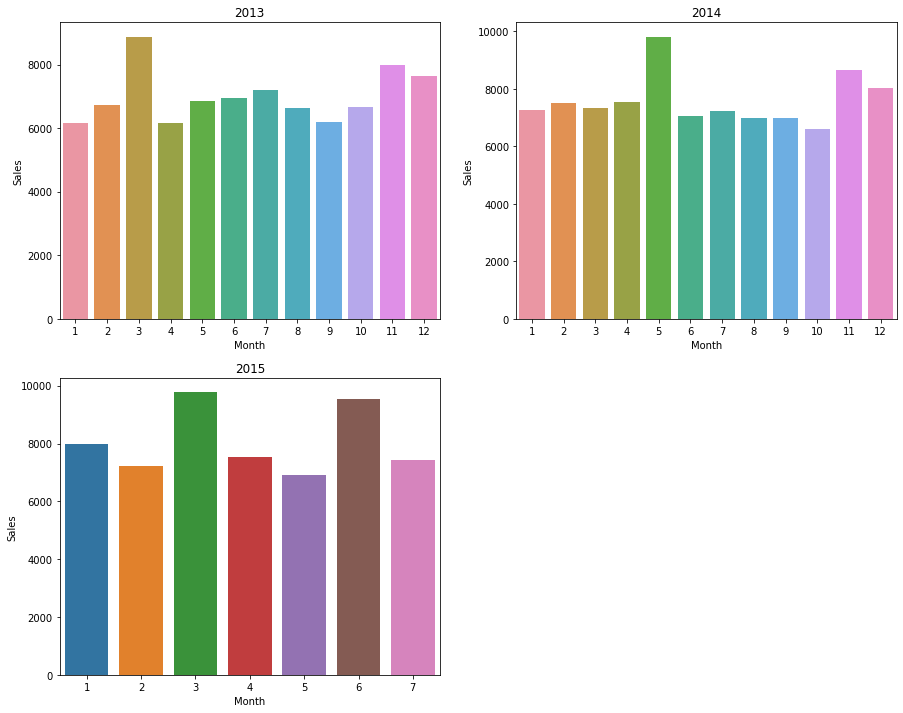

In [50]:
plt.figure(figsize=(15,12))
j=1
for year in years:
    
    plt.subplot(2,2,j)

    sns.barplot(globals()['group_'+ str(year)].index, globals()['group_'+ str(year)].Sales)
    plt.title(year)
    j+=1

### Sales vs assortment ###

In [56]:
assortment_2013 = df[df['year']==2013].groupby('Assortment').agg({'Sales':'mean'})
assortment_2014 = df[df['year']==2014].groupby('Assortment').agg({'Sales':'mean'})
assortment_2015 = df[df['year']==2015].groupby('Assortment').agg({'Sales':'mean'})

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


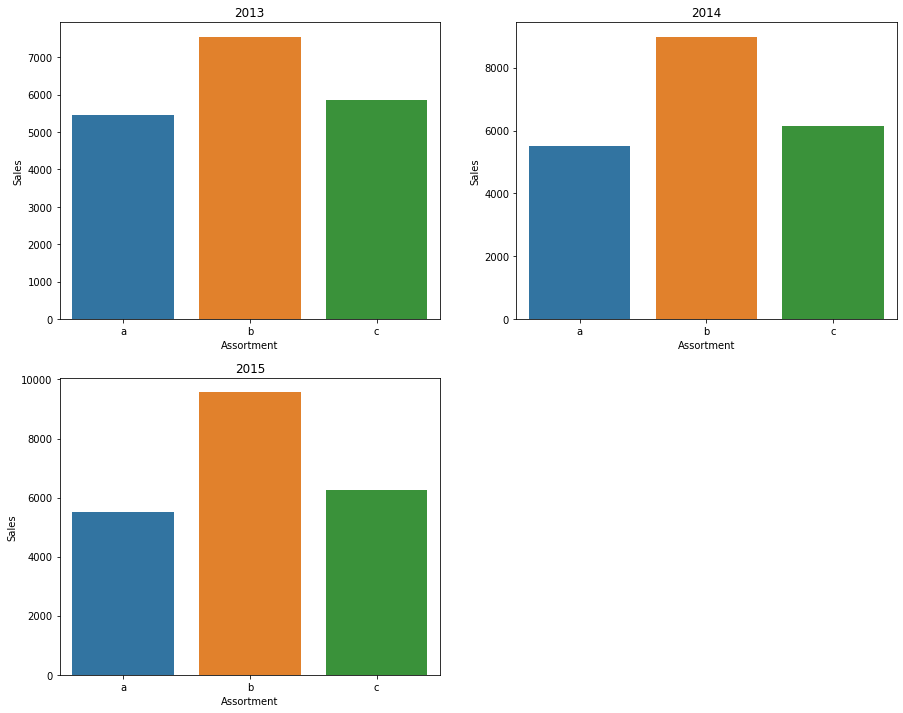

In [59]:
plt.figure(figsize=(15,12))
j=1
for year in years:
    
    plt.subplot(2,2,j)

    sns.barplot(globals()['assortment_'+ str(year)].index, globals()['assortment_'+ str(year)].Sales)
    plt.title(year)
    j+=1

### Sales by store type ###

In [63]:
store_2013 = df[df['year']==2013].groupby('StoreType').agg({'Sales':'mean'})
store_2014 = df[df['year']==2014].groupby('StoreType').agg({'Sales':'mean'})
store_2015 = df[df['year']==2015].groupby('StoreType').agg({'Sales':'mean'})

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


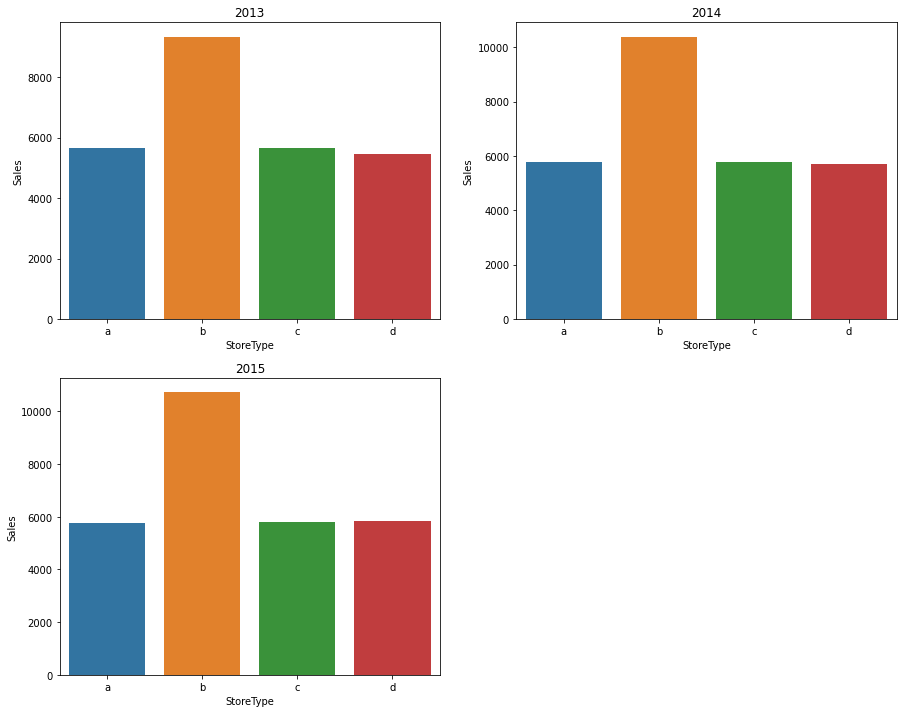

In [64]:
plt.figure(figsize=(15,12))
j=1
for year in years:
    
    plt.subplot(2,2,j)

    sns.barplot(globals()['store_'+ str(year)].index, globals()['store_'+ str(year)].Sales)
    plt.title(year)
    j+=1

### Sales when running a promotion ###

In [66]:
promo_2013 = df[df['year']==2013].groupby('Promo').agg({'Sales':'mean'})
promo_2014 = df[df['year']==2014].groupby('Promo').agg({'Sales':'mean'})
promo_2015 = df[df['year']==2015].groupby('Promo').agg({'Sales':'mean'})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No artists with labels found to put 

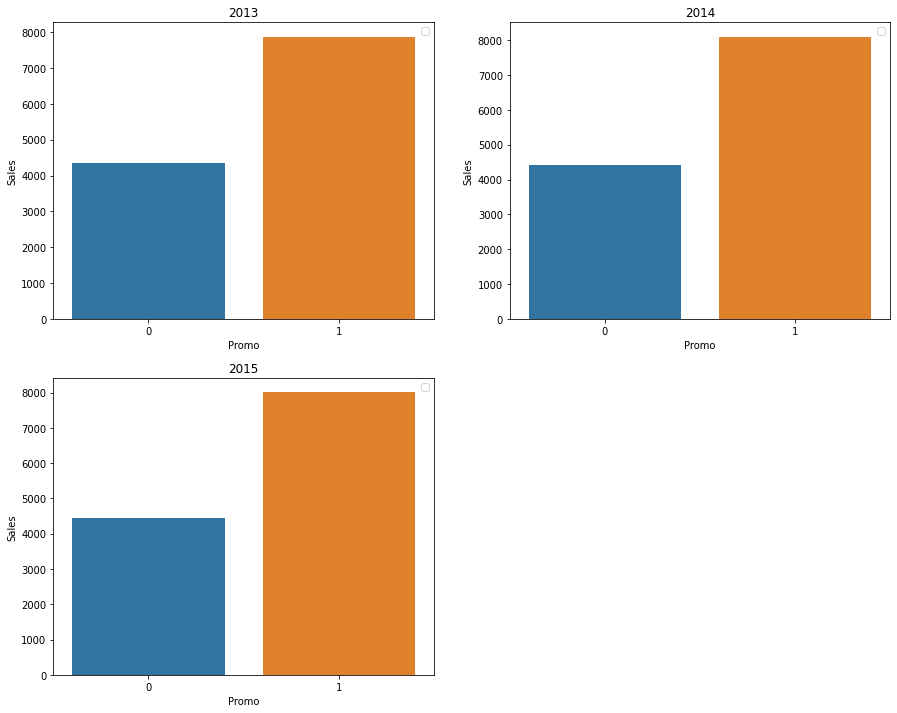

In [73]:
plt.figure(figsize=(15,12))
j=1
for year in years:
    plt.subplot(2,2,j)
    sns.barplot(globals()['promo_'+ str(year)].index, globals()['promo_'+ str(year)].Sales)
    plt.title(year)
    plt.legend()
    j+=1

### Sales while running a long term promotion ###

In [11]:
promo2_2013 = df[df['year']==2013].groupby('Promo2').agg({'Sales':'mean'})
promo2_2014 = df[df['year']==2014].groupby('Promo2').agg({'Sales':'mean'})
promo2_2015 = df[df['year']==2015].groupby('Promo2').agg({'Sales':'mean'})

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\crist\anaconda3\lib\site-pa

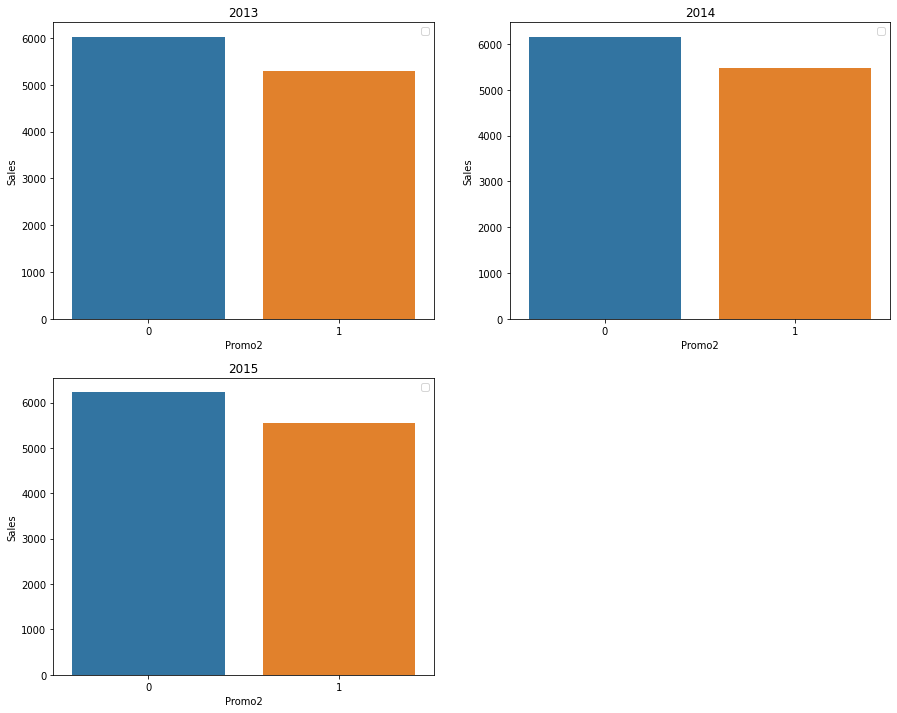

In [12]:
plt.figure(figsize=(15,12))
j=1
for year in years:
    plt.subplot(2,2,j)
    sns.barplot(globals()['promo2_'+ str(year)].index, globals()['promo2_'+ str(year)].Sales)
    plt.title(year)
    plt.legend()
    j+=1

Sales are higher when there is no promotion. Maybe because the promotion is run precisely to attract clients 

### Relationship between Day of the week and promotion ###

In [9]:
promo_day_2013 = df[(df['year']==2013)&(df.Promo == 1)].groupby('DayOfWeek').agg({'Sales':'mean'})
promo_day_2014 = df[(df['year']==2014)&(df.Promo == 1)].groupby('DayOfWeek').agg({'Sales':'mean'})
promo_day_2015 = df[(df['year']==2015)&(df.Promo == 1)].groupby('DayOfWeek').agg({'Sales':'mean'})

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\crist\anaconda3\lib\site-pa

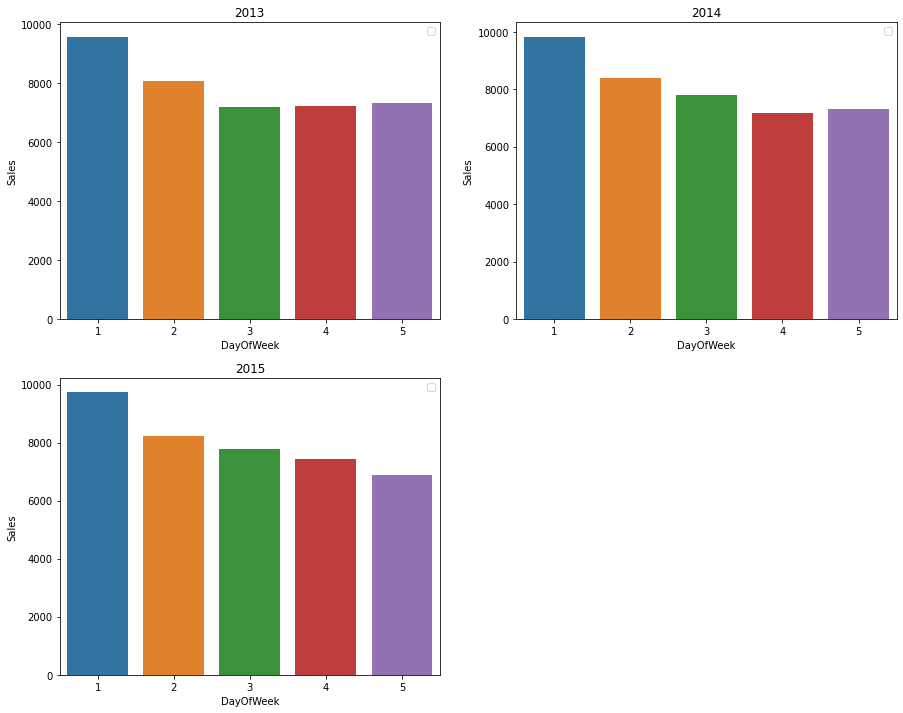

In [10]:
plt.figure(figsize=(15,12))
j=1
for year in years:
    plt.subplot(2,2,j)
    sns.barplot(globals()['promo_day_'+ str(year)].index, globals()['promo_day_'+ str(year)].Sales)
    plt.title(year)
    plt.legend()
    j+=1

We can learn something interesting from this charts. The promotions are only run within the week and not the weekends. However,the da of the week where the sales are higher is Sunday.

We will study whether while running a long term promotion has impact on the day of the week. Considering only when the shops are opened.

In [19]:
prom2_day_2013 = df[(df.year == 2013)&(df.Promo2==1)&(df.Open == 1)].groupby('DayOfWeek').agg({'Sales':'mean'})
prom2_day_2014 = df[(df.year == 2014)&(df.Promo2==1)&(df.Open == 1)].groupby('DayOfWeek').agg({'Sales':'mean'})
prom2_day_2015 = df[(df.year == 2015)&(df.Promo2==1)&(df.Open == 1)].groupby('DayOfWeek').agg({'Sales':'mean'})

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\crist\anaconda3\lib\site-pa

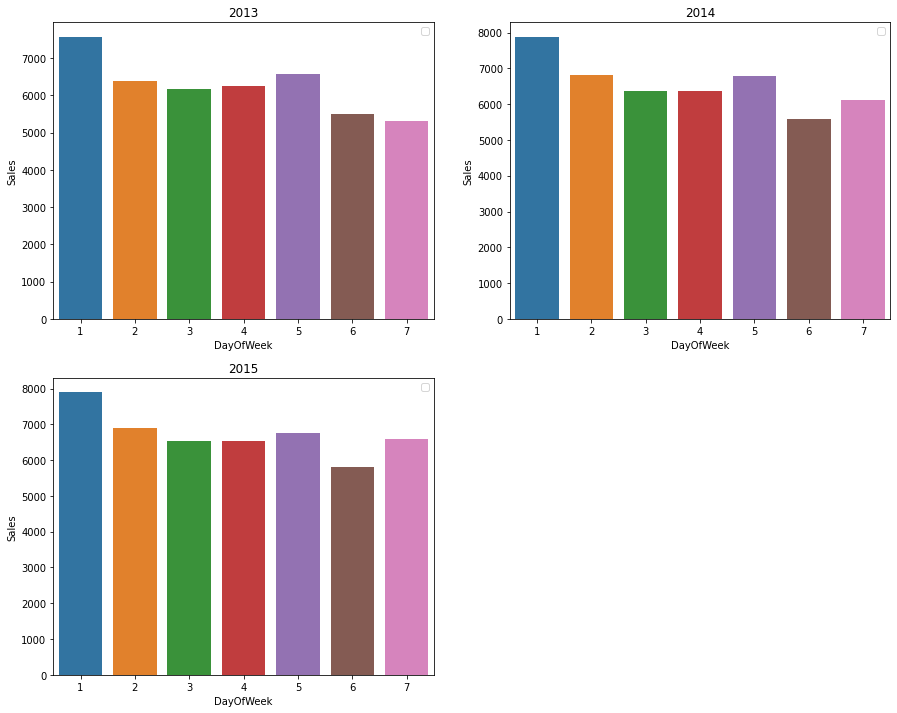

In [21]:
plt.figure(figsize=(15,12))
j=1
for year in years:
    plt.subplot(2,2,j)
    sns.barplot(globals()['prom2_day_'+ str(year)].index, globals()['prom2_day_'+ str(year)].Sales)
    plt.title(year)
    plt.legend()
    j+=1

### Customers and Sales ###

In [74]:
for year in years:
    globals()['cus_'+str(year)] = df[df['year']==year].groupby('month').agg({"Sales": 'mean', "Customers":'mean'})

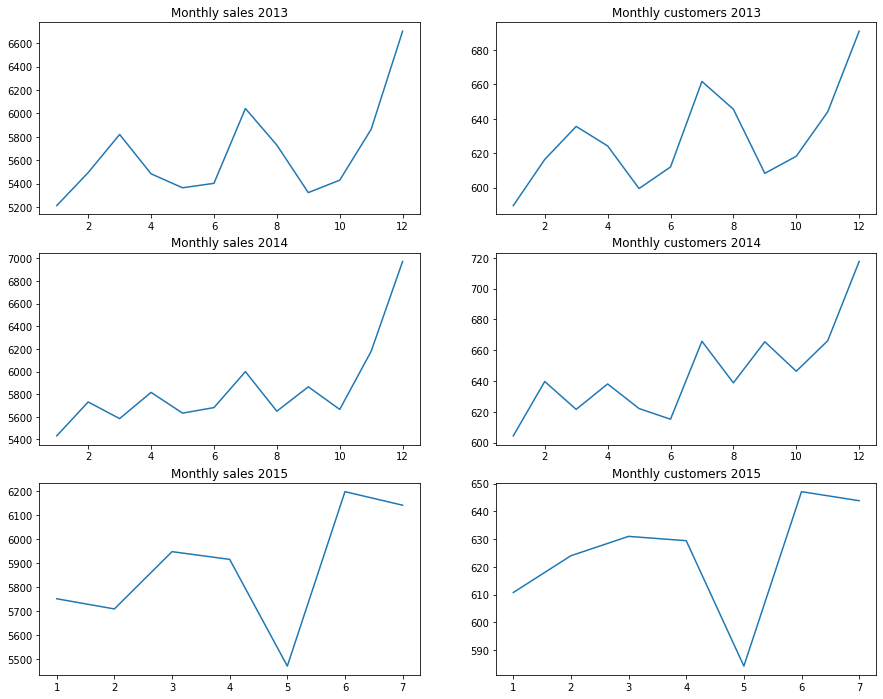

In [88]:
plt.figure(figsize=(15,12))
j=1
for year in years:
    plt.subplot(3,2,j)
    plt.plot(globals()['cus_'+ str(year)].index, globals()['cus_'+ str(year)].Sales)
    plt.title('Monthly sales' + " " + str(year))
    j+=1
    plt.subplot(3,2,j)
    plt.plot(globals()['cus_'+ str(year)].index, globals()['cus_'+ str(year)].Customers)
    plt.title('Monthly customers' + " " + str(year))
    j+=1

As we can expected, the trend is the same. The most customers the stores host the most sales they have.

Splitting the series

C:\Users\crist\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
C:\Users\crist\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
C:\Users\crist\anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
C:\Users\crist\anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead


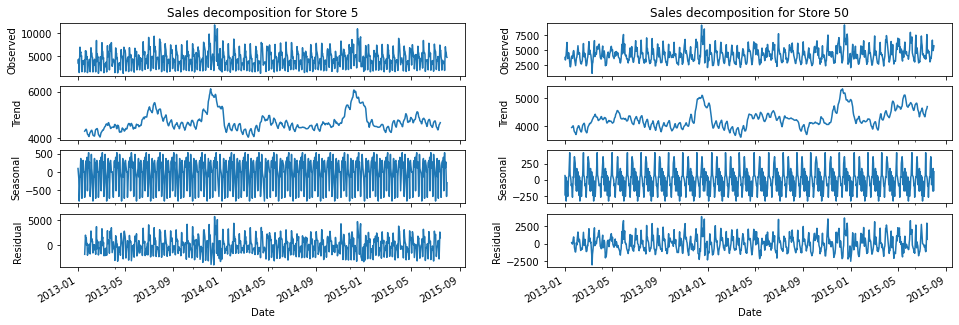

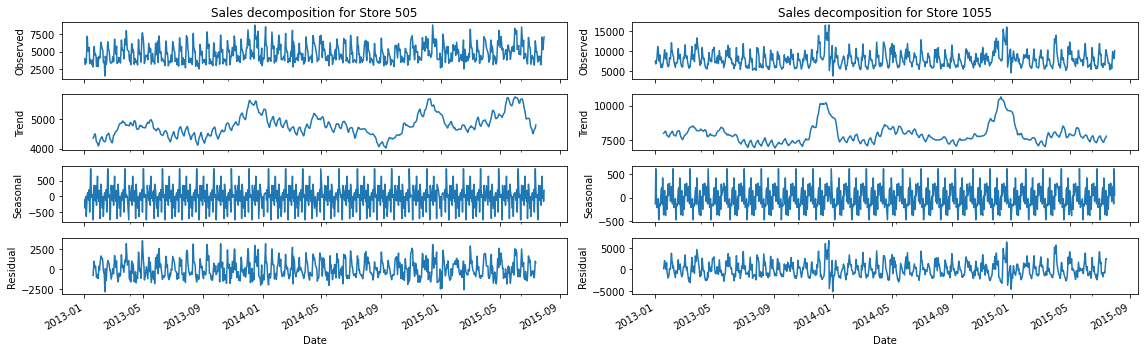

In [23]:
def plotseasonal(res, axes, title):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    axes[0].set_title(title)


fig, axes1 = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,5))
fig, axes2 = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,5))

stores = 
store_5 = df.loc[(df["Store"]==5)&(df['Sales']>0), ['Date',"Sales"]].set_index('Date')
store_50 = df.loc[(df["Store"]==50)&(df['Sales']>0), ['Date',"Sales"]].set_index('Date')
store_505 = df.loc[(df["Store"]==505)&(df['Sales']>0), ['Date',"Sales"]].set_index('Date')
store_1055 = df.loc[(df["Store"]==1055)&(df['Sales']>0), ['Date',"Sales"]].set_index('Date')

result5 = seasonal_decompose(store_5, model='additive', freq=30)
result50 = seasonal_decompose(store_50, model='additive', freq=30)
result505 = seasonal_decompose(store_505, model='additive', freq=30)
result1055 = seasonal_decompose(store_1055, model='additive', freq=30)

plotseasonal(result5, axes1[:,0], title = 'Sales decomposition for Store 5')
plotseasonal(result50, axes1[:,1], title = 'Sales decomposition for Store 50')
plotseasonal(result505, axes2[:,0], title = 'Sales decomposition for Store 505')
plotseasonal(result1055, axes2[:,1], title = 'Sales decomposition for Store 1055')

plt.tight_layout()
plt.show()

As we can see there is practically no trend. In some stores we can see a litle trend that increases when years go by.
Seasonal trends can be easily observed, with a sharp peak suring december

In [12]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None,2015,7
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None,2015,7
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None,2015,7
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None,2015,7
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None,2015,7


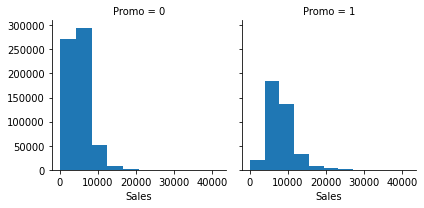

In [6]:
g = sns.FacetGrid(df, col="Promo")
g.map(plt.hist, "Sales");

### Impact competitors in Sales ####

In [4]:
df.CompetitionOpenSinceYear = df.CompetitionOpenSinceYear.fillna(0)

df.CompetitionOpenSinceYear = df.CompetitionOpenSinceYear.astype('int')
df['Competitor'] = np.where(df.year == df.CompetitionOpenSinceYear, 1,0)

In [5]:
compet = df[df['Competitor']==1]
stores = compet.Store.unique()
s = np.random.choice(stores, size = 5)
s

array([326, 598, 326, 550, 604], dtype=int64)

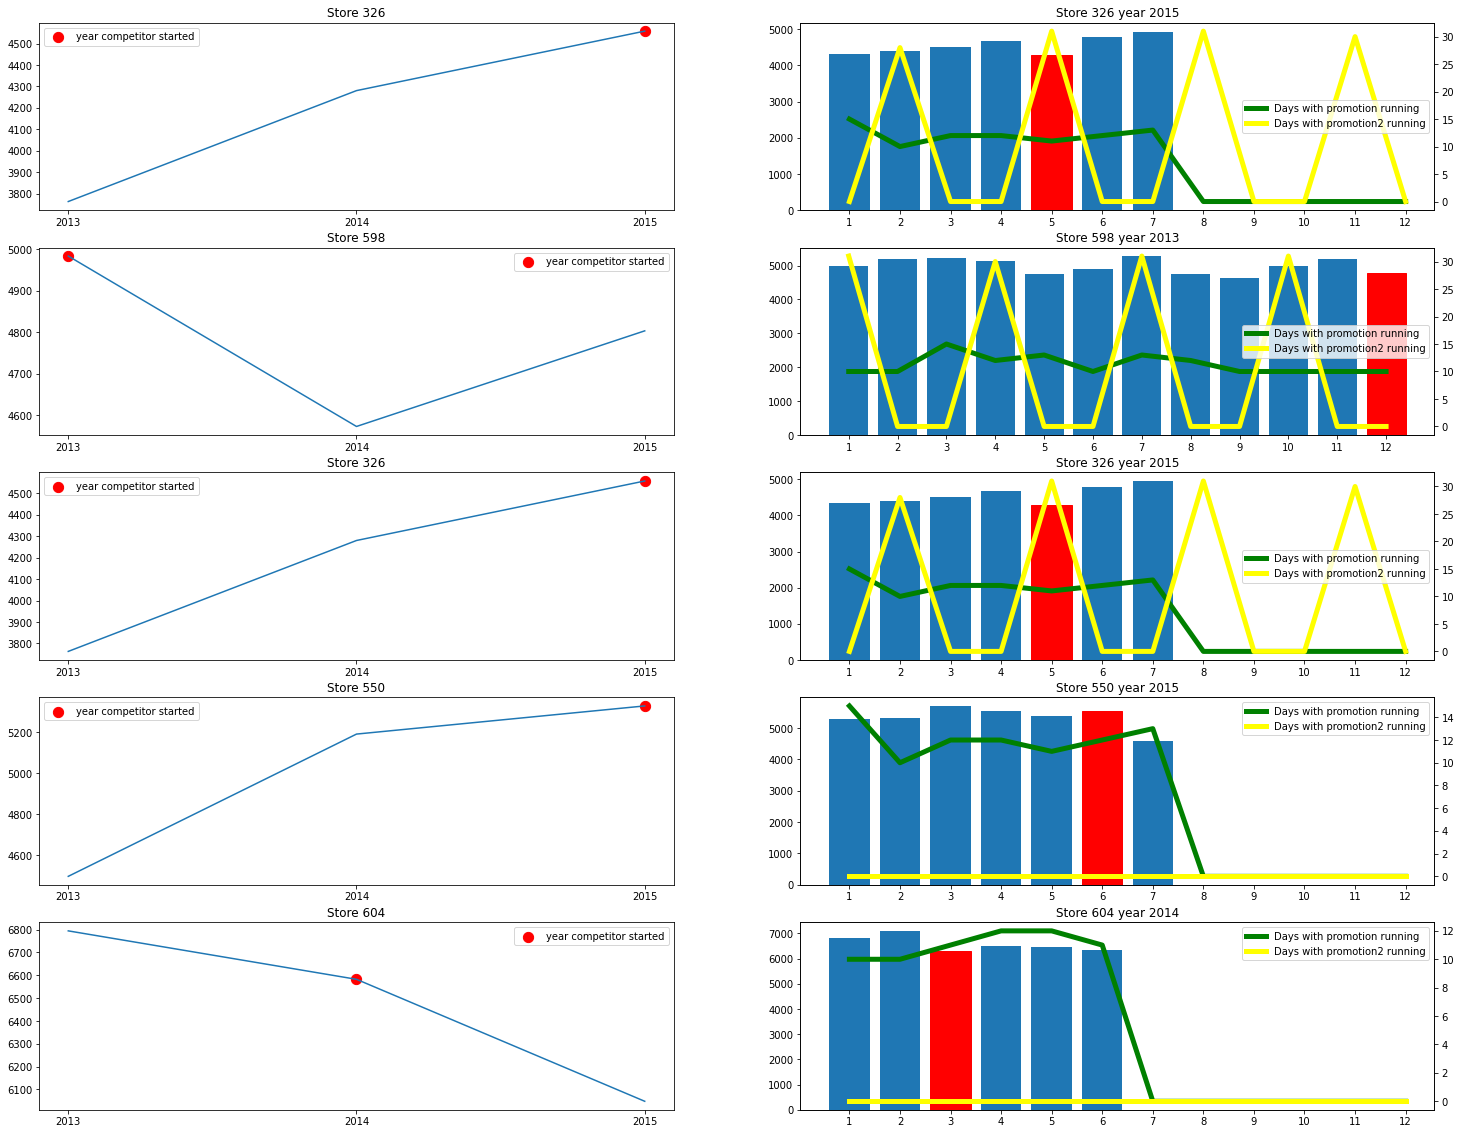

In [6]:
years = [2013,2014,2015]
j=1
plt.figure(figsize=(25,20))
# plots in the left:
for store in s:
    plt.subplot(5,2,j)
    
    d = df[df['Store']==store]
    sales_2013 = d[d['year']==2013]['Sales'].mean()
    sales_2014 = d[d['year']==2014]['Sales'].mean()
    sales_2015 = d[d['year']==2015]['Sales'].mean()
    ax = plt.plot(years, [sales_2013, sales_2014, sales_2015])
    plt.scatter(d[d['Competitor']==1]['year'].unique(), globals()['sales_'+str(d[d['Competitor']==1]['year'].unique()[0])], 
                color = 'red', s=105, label = 'year competitor started')
    plt.xticks(years)
    plt.legend()
    plt.title('Store' + " " + str(store))
    j+=1
    # Graphs in the right:
    plt.subplot(5,2,j)
    year = d[d['Competitor']==1]['year'].unique()[0]
    months = [1,2,3,4,5,6,7,8,9,10,11,12]
    mean_month = []
    for month in months:
        mean_month.append(d[(d['year']==year)&(d['month']== month)]['Sales'].mean())    
    barchart = plt.bar(months, mean_month)
    barchart[(d['CompetitionOpenSinceMonth'].values[0]-1).astype('int')].set_color('r')
    # Adding promo information:
    plt.twinx()
    promo = []
    for month in months:
        a = d[(d['month']==month)&(d['year']==d[d['Competitor']==1]['year'].unique()[0])]
        if not a.empty:
            if a.Promo.value_counts()[1] != 0:
                p = a.Promo.value_counts()[1]
            else:
                p=0
        else:
            p = 0
        promo.append(p) 
    
    # Adding promo2 information:
    op1 = 'Jan,Apr,Jul,Oct'
    op2 = 'Feb,May,Aug,Nov'
    op3 = 'Mar,Jun,Sept,Dec'
    for month in months:
        a = d[(d['month']==month)&(d['year']==d[d['Competitor']==1]['year'].unique()[0])]
        if not a.empty:
            if a.PromoInterval.values[0] == op1:
                p2 = [31,0,0,30,0,0,31,0,0,31,0,0]
            elif a.PromoInterval.values[0] == op2:
                p2 = [0,28,0,0,31,0,0,31,0,0,30,0]
            elif a.PromoInterval.values[0] == op3:
                p2 = [0,0,31,0,0,30,0,0,30,0,0,31]
            else:
                p2 = [0,0,0,0,0,0,0,0,0,0,0,0]
    
    plt.plot(months,promo, color = 'green', label='Days with promotion running', linewidth=5)
    plt.plot(months,p2, color = 'yellow', label='Days with promotion2 running', linewidth=5)
    plt.xticks(months)
    plt.legend()
    plt.title('Store' + " " + str(store) + " " + 'year' + " " + str(year))
    
    # Adding promo2 information:

    j+=1
    

#### Relationship between distance and Competition Distance

C:\Users\crist\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompetitionDistance', ylabel='Density'>

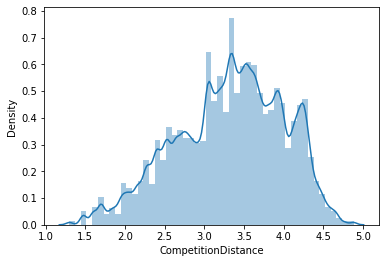

In [75]:
Sales = np.log10(df['CompetitionDistance'])
sns.distplot(Sales)

The competitors distance is between 31.62 m and 100.000 m. The most likely distance is between 1000 and 3170m

In [4]:
df.CompetitionOpenSinceMonth = df.CompetitionOpenSinceMonth.fillna(0)
df.CompetitionOpenSinceMonth = df.CompetitionOpenSinceMonth.astype('int')
df['Month_Competitor'] = np.where((df.month == df.CompetitionOpenSinceMonth)&(df.year==df.CompetitionOpenSinceYear), 1,0)

In [5]:
Competitors = df[df['Month_Competitor']==1].copy()
C = Competitors.groupby(['Store', 'year', 'month']).agg({'Sales':'mean', 'CompetitionDistance':'first'}).reset_index()
Sales2 = C.Sales.values
Sales2 = np.insert(Sales2,0,0)
Sales2 = Sales2[:-1]
C['Sales2'] = Sales2
C.columns = ['Store', 'year', 'month', 'Sales', 'Sales2', 'CompetitionDistance']


In [11]:
C['Drop_Sales'] = np.where(C.Sales2<C.Sales,C.Sales-C.Sales2,"")
C

,Store,year,month,Sales,Sales2,CompetitionDistance,drop_Sales
0,5,2015,4,3796.966667,29910.0,0.000000,
1,6,2013,12,5586.838710,310.0,3796.966667,5276.8387096774195
2,7,2013,4,6579.366667,24000.0,5586.838710,
3,8,2014,10,4940.096774,7520.0,6579.366667,
4,14,2014,3,4678.967742,1300.0,4940.096774,3378.967741935484
...,...,...,...,...,...,...,...
176,1085,2015,2,5954.071429,4030.0,9311.322581,1924.0714285714284
177,1086,2013,11,7649.333333,180.0,5954.071429,7469.333333333333
178,1094,2013,3,3522.258065,2380.0,7649.333333,1142.2580645161293
179,1099,2013,4,6995.600000,200.0,3522.258065,6795.6


In [13]:
Solution = C[C['drop_Sales']!= ""]
Solution

,Store,year,month,Sales,Sales2,CompetitionDistance,drop_Sales
1,6,2013,12,5586.838710,310.0,3796.966667,5276.8387096774195
4,14,2014,3,4678.967742,1300.0,4940.096774,3378.967741935484
5,28,2014,10,3852.483871,1200.0,4678.967742,2652.483870967742
6,30,2014,2,4873.107143,40.0,3852.483871,4833.107142857143
7,33,2013,5,6744.612903,1320.0,4873.107143,5424.612903225807
...,...,...,...,...,...,...,...
176,1085,2015,2,5954.071429,4030.0,9311.322581,1924.0714285714284
177,1086,2013,11,7649.333333,180.0,5954.071429,7469.333333333333
178,1094,2013,3,3522.258065,2380.0,7649.333333,1142.2580645161293
179,1099,2013,4,6995.600000,200.0,3522.258065,6795.6


C:\Users\crist\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Drop_Sales', ylabel='Density'>

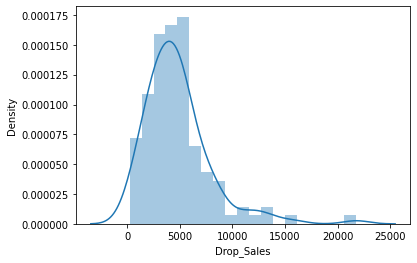

In [113]:
Drop_Sales = Solution['Drop_Sales']
sns.distplot(Drop_Sales)

C:\Users\crist\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompetitionDistance', ylabel='Density'>

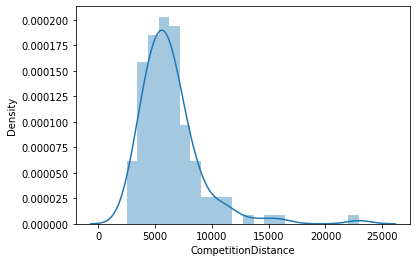

In [114]:
sns.distplot(Solution.CompetitionDistance)

C:\Users\crist\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\crist\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<BarContainer object of 122 artists>

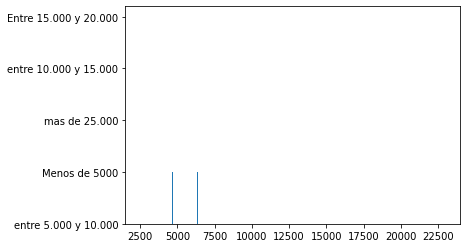

In [21]:
Solution.drop_Sales=Solution.drop_Sales.astype('float64')
Solution['Sales'] = pd.cut(Solution['drop_Sales'],[0,5000.0,10000.0,15000.0,20000.0,50000.0], labels=['Menos de 5000', 'entre 5.000 y 10.000', 'entre 10.000 y 15.000','Entre 15.000 y 20.000', 'mas de 25.000'])
plt.bar(Solution.CompetitionDistance, Solution.Sales)

In [158]:
Solution.describe()

,Store,year,month,Sales2,CompetitionDistance,Drop_Sales
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,561.221311,2013.811475,6.516393,1603.196721,6366.422968,4781.959016
std,336.914426,0.764199,3.070073,1406.509228,2768.011076,3217.964149
min,6.000000,2013.000000,1.000000,30.000000,2536.064516,231.000000
25%,266.750000,2013.000000,4.000000,460.000000,4742.774194,2848.250000
50%,544.500000,2014.000000,6.000000,1235.000000,5905.758065,4329.500000
75%,896.250000,2014.000000,9.000000,2177.500000,7145.664516,5678.750000
max,1111.000000,2015.000000,12.000000,6560.000000,22949.290323,21769.000000


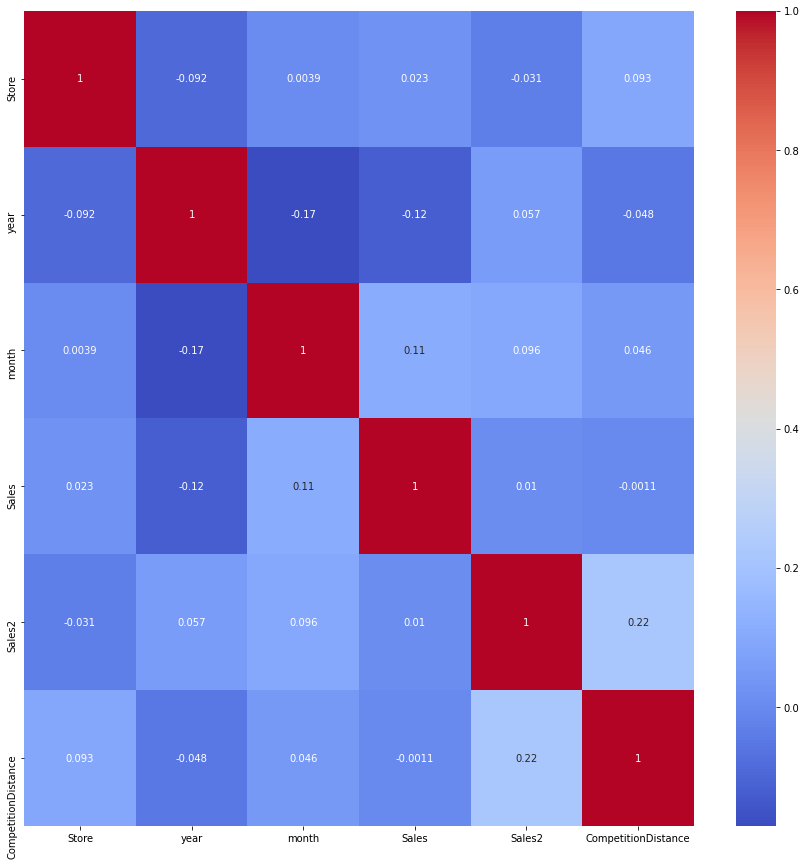

In [19]:
cor = Solution.corr('spearman')
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cor, annot=True, ax=ax, cmap="coolwarm");

We have found with that that the distance is correlated with Sales but with a lag of one month ahead

In [5]:
month = [i for i in range(8)]

In [6]:
month

[0, 1, 2, 3, 4, 5, 6, 7]